# Decision Tree
Decision Trees (DTs) are a non-parametric supervised learning method used for classification. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

## Instruction to Use
1. load data from Github. 
2. run `main`

## Input

1. .csv - produced by pre_processing.ipynb
2. The pre_processed input data includes following techniques:
   * MinMax Scaling
   * PCA
   * Correlation

## Output/Analysis

1. Visualising the accuracy of DT with k-fold validation.
2. Comparing the accuracy of DT model with and without PCA.   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import matplotlib.image as mpimg
import subprocess
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [2]:
acc = []
f1 =  []
acc1 = []
f11 =  []
df = pd.DataFrame()

In [3]:
def load_data(filename):
    return pd.read_csv(filename)

## Utility Function

In [4]:
def displayAnalysisGraphs(list1, acc,f1,model):
    plt.scatter(list1,acc)
    for i in range(len(list1)):
        acc[i]=float('{:,.3f}'.format(acc[i]))
        plt.annotate(str(acc[i]), xy=(list1[i], acc[i]))
    plt.ylabel("Accuracy")
    plt.title("Accuracy for dataset after different preprocessing techniques for "+model)
    plt.savefig("Accuracy"+model+".png")
    plt.show()
    plt.scatter(list1,f1)
    for i in range(len(list1)):
        f1[i]=float('{:,.3f}'.format(f1[i]))
        plt.annotate(str(f1[i]), xy=(list1[i], f1[i]))
    plt.ylabel("F1 score")
    plt.title("F1 scores for dataset after different preprocessing techniques for "+model)
    plt.savefig("F1_scores"+model+".png")
    plt.show()

# Spilt the input file into test and train dataset

I/P: dataframe

O/P: x_cross_val, y_cross_val, x_test, y_test

In [5]:
def prep_training(network_data):
    return train_test_split(network_data, train_size=0.8, test_size=0.2, random_state=42)

In [6]:
from pprint import pprint

In [7]:
def get_data(filename):
    return pd.read_csv(filename)

### RandomizedSearch CV versus GridSearchCV

Grid Search is good when we work with a small number of hyperparameters. However, if the number of parameters to consider is particularly high and the magnitudes of influence are imbalanced, the better choice is to use the Random Search. [Reference](https://towardsdatascience.com/machine-learning-gridsearchcv-randomizedsearchcv-d36b89231b10)

Therefore, we have used GridSearchCV.

In [8]:
def creatingParamterGrid():
    #n_estimators = [30,60,90,120]   # Number of trees in random forest
    max_depth = [2,4,6]    # Maximum number of levels in tree
    #min_samples_split = [2,4,6]    # Minimum number of samples required to split a node
    myCriterion = ['gini', 'entropy']
    
    # Create the parameter grid
    parameter_grid = {'max_depth': max_depth,
                     'criterion': myCriterion}
    return parameter_grid

## Cross-Validated Grid Search

We are now ready to create our grid-search object. We'll use each of the objects we've created thus far.
Instead of passing a `PredefinedSplit` object tothe `cv` paramter, we are simply passing the number of folds.

In [9]:
def prepToFindOptimalHyperParams(clf,parameter_grid):
    grid_search = GridSearchCV(estimator=clf, cv=3, param_grid = parameter_grid)
    return grid_search

## Training the Model

Now that we have created our `grid_search` object, we are ready to train our model.

In [10]:
def train(cross_val_df,grid_search):
    grid_search.fit(cross_val_df.drop("label",axis=1), cross_val_df["label"])
    Xpred = grid_search.predict(cross_val_df.drop("label",axis=1))
    print("accuracy on train is",accuracy_score(cross_val_df["label"],Xpred))

## Cross-validated Results

To examine the results individual fold, we use `grid_search`'s `cv_results_` attribute.
pd.DataFrame(grid_search.cv_results_).head()

## Optimal Hyperparamters

grid_search.best_params_
grid_search.best_score_
# Test the model and analyse it

In [11]:
def testDecisionTreeModel(test_df,grid_search,type):
    Ytest = test_df["label"]
    Ypred = grid_search.predict(test_df.drop("label",axis=1))
    print(classification_report(Ytest,Ypred))   
    acc1.append(accuracy_score(Ytest,Ypred))
    acc=accuracy_score(Ytest,Ypred)
    print('Accuracy of Random Forest:',(acc)) 
    f1.append(f1_score(Ytest,Ypred))
    plt.savefig('confusion_matrix'+type+'.jpg')
    cm = confusion_matrix(Ytest, Ypred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax) 
    print(cm)
    return acc1

# Main Function

In [12]:
def main(network_data,type):  
    clf = DecisionTreeClassifier(random_state = 42)
    cross_val_df, test_df = prep_training(network_data)
    parameter_grid = creatingParamterGrid()
    pprint(parameter_grid)
    grid_search = prepToFindOptimalHyperParams(clf,parameter_grid)
    train(cross_val_df,grid_search)
    acc1=testDecisionTreeModel(test_df,grid_search,type)
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    return grid_search,acc1

## Classification with DT without Preprocessing
We also drop 'attack_cat' because there is only one encoded digit for non-attack category.

In [13]:
network_data = load_data('https://raw.githubusercontent.com/divyaKh/CMPE255Project/main/2.Data_Cleaning/cleaned_dataset_label_encoding.csv')

{'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, 6]}
accuracy on train is 0.9198304048744045
              precision    recall  f1-score   support

           0       0.91      0.86      0.89     18675
           1       0.92      0.95      0.94     32860

    accuracy                           0.92     51535
   macro avg       0.92      0.91      0.91     51535
weighted avg       0.92      0.92      0.92     51535

Accuracy of Random Forest: 0.91974386339381
[[16041  2634]
 [ 1502 31358]]
{'criterion': 'gini', 'max_depth': 6}
0.9194956803083277


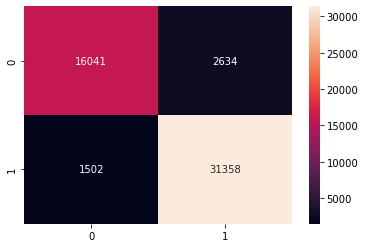

In [14]:
if 'attack_cat' in list(network_data):
    network_data = network_data.drop("attack_cat",axis=1)
grid_search,acc1 = main(network_data,'withoutpreprocess')

In [15]:
df['Accuracy_without_pp'] =acc1
df['F1_score_without_pp']=f1

In [16]:
df

,Accuracy_without_pp,F1_score_without_pp
0,0.919744,0.938132


## Classification with DT after MinMax Scaling 

In [17]:
network_data1 = load_data('../input/dataset_minmax.csv')

In [18]:
network_data1

,# dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,1.833334e-07,0.901515,0.000000,0.5,0.000094,0.000000,0.000033,0.000000,0.090909,0.996078,...,0.000000,0.000000,0.015625,0.0,0.0,0.0,0.000000,0.016393,0.0,0
1,1.333334e-07,0.901515,0.000000,0.5,0.000094,0.000000,0.000121,0.000000,0.125000,0.996078,...,0.000000,0.000000,0.015625,0.0,0.0,0.0,0.000000,0.016393,0.0,0
2,8.333335e-08,0.901515,0.000000,0.5,0.000094,0.000000,0.000073,0.000000,0.200000,0.996078,...,0.000000,0.000000,0.031250,0.0,0.0,0.0,0.000000,0.032787,0.0,0
3,1.000000e-07,0.901515,0.000000,0.5,0.000094,0.000000,0.000061,0.000000,0.166667,0.996078,...,0.017241,0.000000,0.031250,0.0,0.0,0.0,0.016949,0.032787,0.0,0
4,1.666667e-07,0.901515,0.000000,0.5,0.000094,0.000000,0.000146,0.000000,0.100000,0.996078,...,0.017241,0.000000,0.031250,0.0,0.0,0.0,0.016949,0.032787,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,1.500000e-07,0.901515,0.166667,0.5,0.000094,0.000000,0.000006,0.000000,0.111111,0.996078,...,0.396552,0.266667,0.359375,0.0,0.0,0.0,0.389831,0.377049,0.0,1
257669,8.429368e-03,0.856061,0.000000,0.4,0.000845,0.000726,0.000042,0.000024,0.000034,0.996078,...,0.000000,0.000000,0.015625,0.0,0.0,0.0,0.000000,0.000000,0.0,1
257670,1.500000e-07,0.901515,0.166667,0.5,0.000094,0.000000,0.000006,0.000000,0.111111,0.996078,...,0.034483,0.044444,0.187500,0.0,0.0,0.0,0.033898,0.180328,0.0,1
257671,1.500000e-07,0.901515,0.166667,0.5,0.000094,0.000000,0.000006,0.000000,0.111111,0.996078,...,0.500000,0.288889,0.453125,0.0,0.0,0.0,0.491525,0.475410,0.0,1


{'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, 6]}
accuracy on train is 0.9198304048744045
              precision    recall  f1-score   support

           0       0.91      0.86      0.89     18675
           1       0.92      0.95      0.94     32860

    accuracy                           0.92     51535
   macro avg       0.92      0.91      0.91     51535
weighted avg       0.92      0.92      0.92     51535

Accuracy of Random Forest: 0.91974386339381
[[16041  2634]
 [ 1502 31358]]
{'criterion': 'gini', 'max_depth': 6}
0.9194956802377273


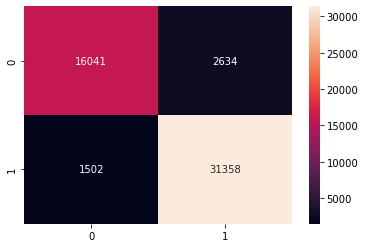

In [19]:
grid_search1,acc1= main(network_data1,'minmax')

In [20]:
pd.DataFrame(grid_search1.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.476891,0.036650,0.016055,0.001008,gini,2,"{'criterion': 'gini', 'max_depth': 2}",0.871233,0.871349,0.872220,0.871601,0.000441,5
1,0.773196,0.007405,0.016357,0.000260,gini,4,"{'criterion': 'gini', 'max_depth': 4}",0.908111,0.911181,0.909477,0.909590,0.001256,2
2,1.041543,0.004318,0.017197,0.000535,gini,6,"{'criterion': 'gini', 'max_depth': 6}",0.919840,0.918618,0.920029,0.919496,0.000625,1
3,0.508366,0.004546,0.015623,0.000170,entropy,2,"{'criterion': 'entropy', 'max_depth': 2}",0.870840,0.870985,0.872148,0.871324,0.000585,6
4,0.835438,0.008309,0.016737,0.000374,entropy,4,"{'criterion': 'entropy', 'max_depth': 4}",0.885247,0.887605,0.885944,0.886266,0.000989,4


In [21]:
df['Accuracy_rf_mm'] =acc1[1]
df['F1_score1_rf_mm']=f1[1]

In [22]:
df

,Accuracy_without_pp,F1_score_without_pp,Accuracy_rf_mm,F1_score1_rf_mm
0,0.919744,0.938132,0.919744,0.938132


# Classification with RF after MinMax Scaling + Correlation analysis

In [23]:
network_data2 = load_data('../input/dataset_minmax_corr.csv')

{'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, 6]}
accuracy on train is 0.9068197033055526
              precision    recall  f1-score   support

           0       0.98      0.76      0.86     18675
           1       0.88      0.99      0.93     32860

    accuracy                           0.91     51535
   macro avg       0.93      0.88      0.89     51535
weighted avg       0.91      0.91      0.90     51535

Accuracy of Random Forest: 0.9068982245076161
[[14199  4476]
 [  322 32538]]
{'criterion': 'gini', 'max_depth': 6}
0.9064752759828201


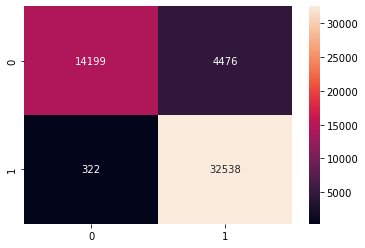

In [24]:
grid_search2,acc1 = main(network_data2,'minmax_corr')

In [25]:
pd.DataFrame(grid_search2.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.403289,0.015205,0.013882,0.000116,gini,2,"{'criterion': 'gini', 'max_depth': 2}",0.871233,0.871349,0.872220,0.871601,0.000441,5
1,0.666296,0.016497,0.013993,0.000091,gini,4,"{'criterion': 'gini', 'max_depth': 4}",0.895173,0.895769,0.895506,0.895483,0.000244,2
2,0.870234,0.001634,0.015019,0.000687,gini,6,"{'criterion': 'gini', 'max_depth': 6}",0.906582,0.905928,0.906916,0.906475,0.000411,1
3,0.437871,0.006418,0.014465,0.000784,entropy,2,"{'criterion': 'entropy', 'max_depth': 2}",0.870840,0.870985,0.872148,0.871324,0.000585,6
4,0.701955,0.004539,0.014631,0.000451,entropy,4,"{'criterion': 'entropy', 'max_depth': 4}",0.873401,0.873576,0.874039,0.873672,0.000269,4


In [26]:
df['Accuracy2_rf_mm_corr'] =acc1[2]
df['F1_score2_rf_mm_corr']=f1[2]

In [27]:
df

,Accuracy_without_pp,F1_score_without_pp,Accuracy_rf_mm,F1_score1_rf_mm,Accuracy2_rf_mm_corr,F1_score2_rf_mm_corr
0,0.919744,0.938132,0.919744,0.938132,0.906898,0.931334


## Classification with DT after Dimension Reduction (using PCA)

In [28]:
network_data3 = load_data('../input/dataset_pca.csv')

{'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, 6]}
accuracy on train is 0.8945948830395172
              precision    recall  f1-score   support

           0       0.99      0.72      0.83     18675
           1       0.86      1.00      0.92     32860

    accuracy                           0.90     51535
   macro avg       0.93      0.86      0.88     51535
weighted avg       0.91      0.90      0.89     51535

Accuracy of Random Forest: 0.8954302900941108
[[13397  5278]
 [  111 32749]]
{'criterion': 'gini', 'max_depth': 6}
0.8938332552800577


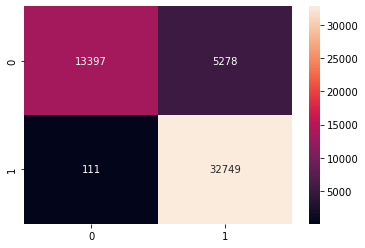

In [29]:
grid_search3,acc1 = main(network_data3,'pca')

In [30]:
pd.DataFrame(grid_search3.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.188848,0.172293,0.017987,0.002448,gini,2,"{'criterion': 'gini', 'max_depth': 2}",0.863214,0.864247,0.865817,0.864426,0.001070,5
1,2.465194,0.438405,0.016290,0.001283,gini,4,"{'criterion': 'gini', 'max_depth': 4}",0.881784,0.881245,0.881389,0.881473,0.000228,3
2,3.424456,0.254883,0.016300,0.000561,gini,6,"{'criterion': 'gini', 'max_depth': 6}",0.894241,0.893848,0.893410,0.893833,0.000339,1
3,1.621380,0.103284,0.017065,0.002437,entropy,2,"{'criterion': 'entropy', 'max_depth': 2}",0.843247,0.843028,0.840203,0.842159,0.001386,6
4,2.967847,0.181783,0.018367,0.002522,entropy,4,"{'criterion': 'entropy', 'max_depth': 4}",0.876181,0.876137,0.876499,0.876272,0.000161,4


In [31]:
df['Accuracy2_rf_pca'] =acc1[3]
df['F1_score2_rf_pca']=f1[3]

In [32]:
df

,Accuracy_without_pp,F1_score_without_pp,Accuracy_rf_mm,F1_score1_rf_mm,Accuracy2_rf_mm_corr,F1_score2_rf_mm_corr,Accuracy2_rf_pca,F1_score2_rf_pca
0,0.919744,0.938132,0.919744,0.938132,0.906898,0.931334,0.89543,0.923978


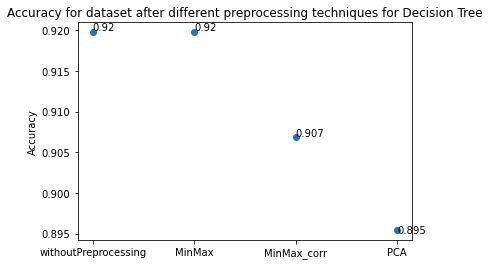

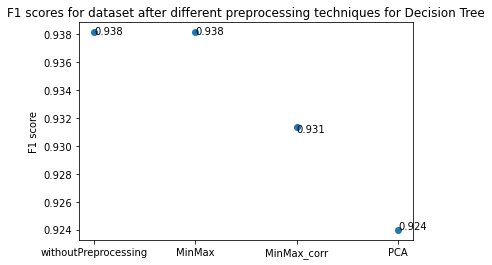

In [33]:
list1 = ['withoutPreprocessing','MinMax','MinMax_corr','PCA']
displayAnalysisGraphs(list1,acc1,f1,"Decision_Tree")